In [1]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

# 2D turbulence in eddy model

In [37]:
eddy_model = pyqg.QGModel(nx=128, dt=1800, tmax=311040000.0, twrite=10000, tavestart=155520000.0, beta=0) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [38]:
# run simulation to gather data initially

## From here, you can call .run() to run a new simulation
eddy_model.run()

## Convert to xarray Datasets
eddy_model_highRes = eddy_model.to_dataset()

INFO: Step: 10000, Time: 1.80e+07, KE: 1.83e-06, CFL: 0.006
INFO: Step: 20000, Time: 3.60e+07, KE: 6.31e-05, CFL: 0.014
INFO: Step: 30000, Time: 5.40e+07, KE: 1.38e-03, CFL: 0.074
INFO: Step: 40000, Time: 7.20e+07, KE: 1.76e-03, CFL: 0.088
INFO: Step: 50000, Time: 9.00e+07, KE: 1.69e-03, CFL: 0.086
INFO: Step: 60000, Time: 1.08e+08, KE: 1.71e-03, CFL: 0.090
INFO: Step: 70000, Time: 1.26e+08, KE: 1.81e-03, CFL: 0.080
INFO: Step: 80000, Time: 1.44e+08, KE: 1.72e-03, CFL: 0.125
INFO: Step: 90000, Time: 1.62e+08, KE: 1.76e-03, CFL: 0.092
INFO: Step: 100000, Time: 1.80e+08, KE: 1.62e-03, CFL: 0.126
INFO: Step: 110000, Time: 1.98e+08, KE: 1.56e-03, CFL: 0.147
INFO: Step: 120000, Time: 2.16e+08, KE: 1.56e-03, CFL: 0.146
INFO: Step: 130000, Time: 2.34e+08, KE: 1.64e-03, CFL: 0.125
INFO: Step: 140000, Time: 2.52e+08, KE: 1.78e-03, CFL: 0.147
INFO: Step: 150000, Time: 2.70e+08, KE: 1.69e-03, CFL: 0.098
INFO: Step: 160000, Time: 2.88e+08, KE: 1.59e-03, CFL: 0.114
INFO: Step: 170000, Time: 3.06e+0

In [39]:
# after initial run, generate snapshots of model

def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

eddy_model_highRes = generate_snapshots(eddy_model)
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 128, x: 128, l: 128, k: 65,
                        lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * y                  (y) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0003958 0.0004021
Data variables: (12/32)
    q                  (time, lev, y, x) float64 2.395e-06 ... -2.389e-06
    u                  (time, lev, y, x) float64 -0.005031 -0.03398 ... 0.01164
    v                  (time, lev, y, x) float64 0.02878 -0.03316 ... 0.007233
    ufull              (time, lev, y, x) float64 0.01997 -0.008981 ... 0.01164
    vfull              (time, lev, y, x) float64 0.02878 -0.03316 ... 0.007233
    qh                 (time, lev, l, k) complex128 (0.009756754976270912+0j)...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 8.586e-21 ... 4.444e-58 8.47e-64
    ENSfrictionspec    (time, l, k) float64 0.0 3.43e-23 ... -2.856e-61
    APEgenspec         (time, l, k) float64 0.0 1.932e-12 ... 1.906e-55
    APEflux            (time, l, k) float64 -0.0 -1.34e-12 ... 1.27e-35
    KEflux             (time, l, k) float64 0.0 2.103e-13 ... 1.35e-30 3.879e-33
    APEgen             (time) float64 3.405e-10
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [48]:
# write data to scratch bucket after initial run

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
eddy_model_highRes.to_zarr('gs://leap-scratch/panalluri/eddy_model_highRes.zarr')  # write data

In [44]:
# check to see files present in scratch
#gcs = fsspec.filesystem('gcs')
#gcs.ls("gs://leap-scratch/panalluri")

['leap-scratch/panalluri/eddy_model_highRes.zarr',
 'leap-scratch/panalluri/eddy_model_highRes2.zarr',
 'leap-scratch/panalluri/eddy_model_highRes3.zarr']

In [31]:
# access data set to be used -- data from a previous simulation

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
gcs = fsspec.filesystem('gcs')
gcs.ls("gs://leap-scratch/panalluri")
eddy_model_highRes = xr.open_zarr("gs://leap-scratch/panalluri/eddy_model_highRes.zarr") 
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, l: 256, k: 129, lev: 2, y: 256, x: 256,
                        lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.000798 0.0008042
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 3.11e+08
  * x                  (x) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * y                  (y) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
Data variables: (12/32)
    APEflux            (time, l, k) float64 dask.array<chunksize=(1, 128, 129), meta=np.ndarray>
    APEgen             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    APEgenspec         (time, l, k) float64 dask.array<chunksize=(1, 128, 129), meta=np.ndarray>
    Dissspec           (time, l, k) float64 dask.array<chunksize=(1, 128, 129), meta=np.ndarray>
    EKE                (time, lev) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    EKEdiss            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                 ...
    u                  (time, lev, y, x) float64 dask.array<chunksize=(1, 1, 128, 256), meta=np.ndarray>
    ufull              (time, lev, y, x) float64 dask.array<chunksize=(1, 1, 128, 256), meta=np.ndarray>
    uh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 1, 128, 129), meta=np.ndarray>
    v                  (time, lev, y, x) float64 dask.array<chunksize=(1, 1, 128, 256), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(1, 1, 128, 256), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 1, 128, 129), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          65536
    pyqg:W:          1000000.0
    pyqg:beta:       0
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  155520000.0
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

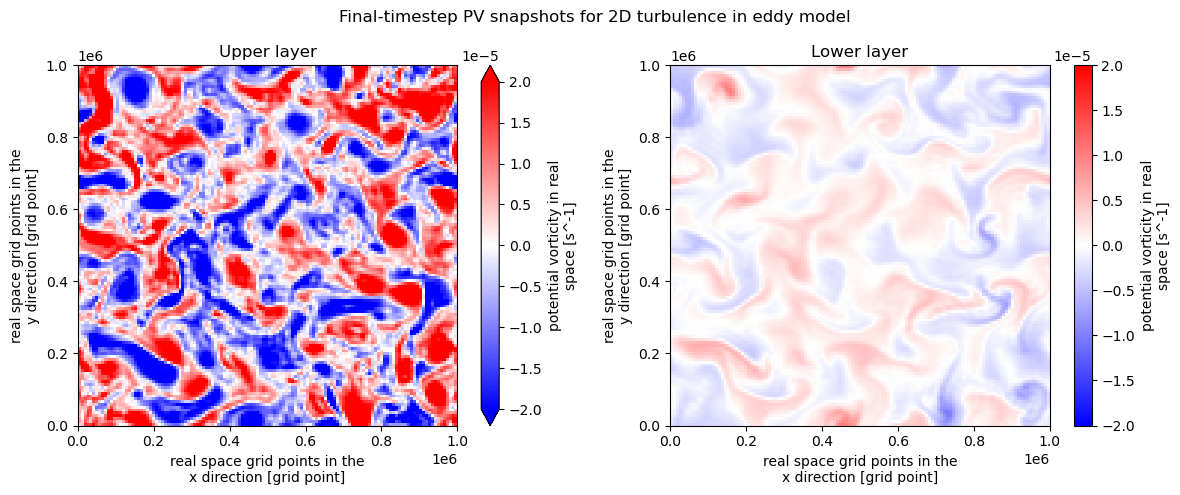

In [41]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep PV snapshots for 2D turbulence in eddy model")
plt.subplot(121); eddy_model_highRes.q.isel(lev=0, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title("Upper layer")
plt.subplot(122); eddy_model_highRes.q.isel(lev=1, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title( "Lower layer")
plt.tight_layout()

## Coarsening data

In [42]:
import pyqg_parameterization_benchmarks.coarsening_ops as coarsening

ISSUE: For whatever reason, the coarsening dataset is not properly coarsened unless the eddy model is first run. Additionally, the coarsened dataset does not plot properly unless the eddy model is run, even if we load our dataset from the bucket.

In [43]:
op1 = coarsening.Operator1(eddy_model, 64) #for now, need to re-run above simulation for this to work -- maybe make a coarsening data section w/ and w/o the op1 data structure?
op1.m2.to_dataset()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


<xarray.Dataset>
Dimensions:  (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time     (time) float64 0.0
  * lev      (lev) int64 1 2
  * lev_mid  (lev_mid) float64 1.5
  * x        (x) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y        (y) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * l        (l) float64 0.0 6.283e-06 1.257e-05 ... -1.257e-05 -6.283e-06
  * k        (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/14)
    q        (time, lev, y, x) float64 9.348e-06 1.041e-05 ... -2.13e-06
    u        (time, lev, y, x) float64 -0.01677 -0.04424 ... 0.006006 0.01211
    v        (time, lev, y, x) float64 0.008376 -0.01888 ... -0.01018 0.002434
    ufull    (time, lev, y, x) float64 0.008232 -0.01924 ... 0.006006 0.01211
    vfull    (time, lev, y, x) float64 0.008376 -0.01888 ... -0.01018 0.002434
    qh       (time, lev, l, k) complex128 (0.0024391887440677286+0j) ... (2.5...
    ...       ...
    ph       (time, lev, l, k) complex128 0j ... (-1.7506165409075686e-15-2.6...
    dqhdt    (time, lev, l, k) complex128 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j
    Ubg      (lev) float64 0.025 0.0
    Qy       (lev) float64 8.889e-11 -2.222e-11
    dqdt     (time, lev, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    p        (time, lev, y, x) float64 -4.108e+03 -4.185e+03 ... -869.1 -923.4
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [44]:
# Helper function to display plots
def imshow(arr, vlim=3e-5):
    plt.xticks([]); plt.yticks([])
    return plt.imshow(arr, vmin=-vlim, vmax=vlim, cmap='bwr', interpolation='none')

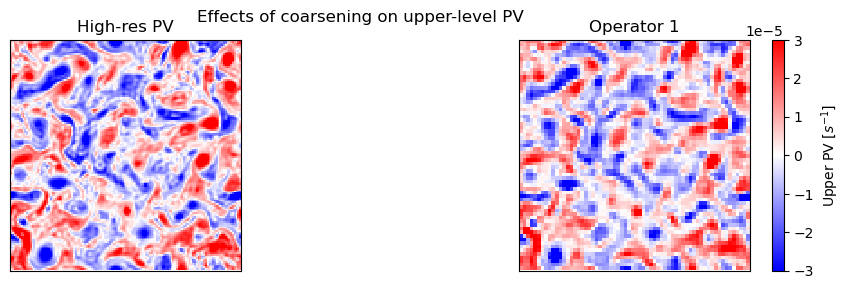

In [45]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on upper-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(eddy_model.q[0])
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[0])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

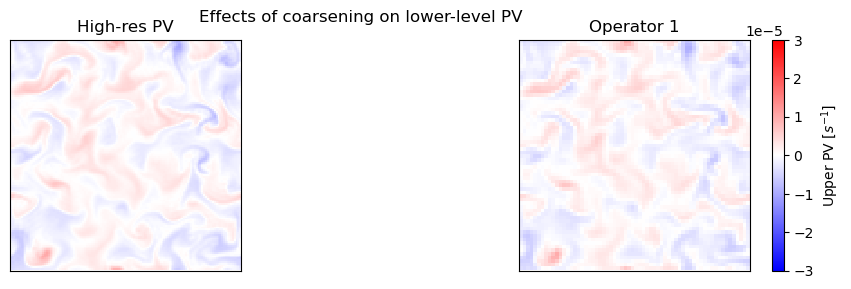

In [49]:
# Visualizing effects on lower-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on lower-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(eddy_model.q[1])
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[1])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

Text(0.5, 0.98, 'Effects on upper PV forcing term')

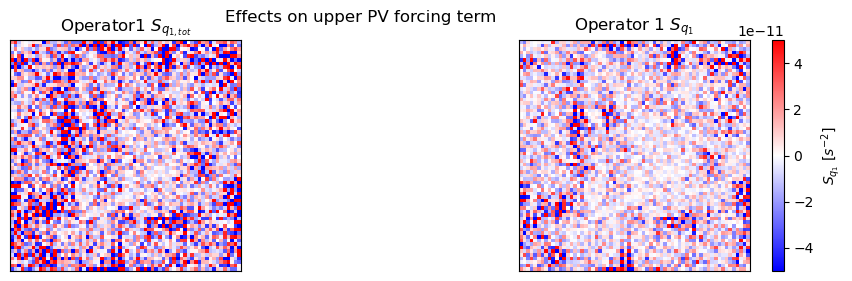

In [50]:
# Visualizing effects on upper PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[0], 3e-11)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[0], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on upper PV forcing term')

Text(0.5, 0.98, 'Effects on lower PV forcing term')

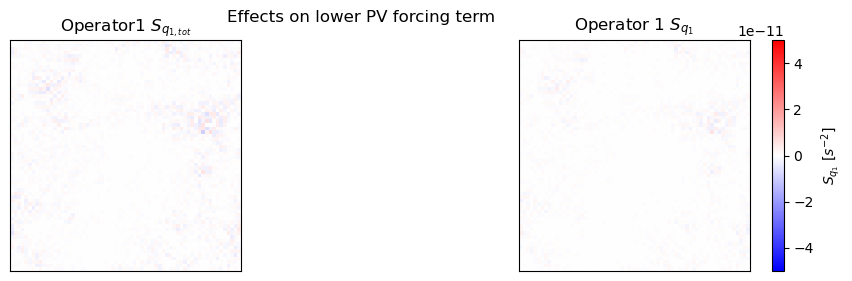

In [51]:
# Visualizing effects on lower PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[1], 3e-11)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[1], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on lower PV forcing term')

## Train FCNN on this data

In [52]:
from pyqg_parameterization_benchmarks.neural_networks import FCNNParameterization, FullyCNN

In [28]:
#to load back in coarsening op1 data (w/ SGS forcing parameters added back in)

gcs = fsspec.filesystem('gcs')
gcs.ls("gs://leap-scratch/panalluri")
training_dss = xr.open_zarr("gs://leap-scratch/panalluri/eddy_model_coarseningOp1.zarr")
training_dss

<xarray.Dataset>
Dimensions:            (lev: 2, time: 1, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 0.0
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/23)
    Qy                 (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Ubg                (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    dqdt               (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    dqhdt              (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    p                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    ph                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    ...                 ...
    v                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    v_subgrid_forcing  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    vq_subgrid_flux    (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vv_subgrid_flux    (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       0
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  315360000.0
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

In [53]:
#if SGS forcing params haven't been added into forcing operator dataset yet

training_ds = op1.m2.to_dataset()
q_subs = op1.subgrid_forcing('q')
q_tot_subs = op1.q_forcing_total
u_subs = op1.subgrid_forcing('u')
v_subs = op1.subgrid_forcing('v')
uu_subs, uv_subs = op1.subgrid_fluxes('u')
vu_subs, vv_subs = op1.subgrid_fluxes('v')
qu_subs, qv_subs = op1.subgrid_fluxes('q')
training_dss = training_ds.assign(q_subgrid_forcing=training_ds['dqdt'] * 0 + q_subs, 
                                  q_forcing_total=training_ds['dqdt'] * 0 + q_tot_subs,
                                  v_subgrid_forcing=training_ds['dqdt'] * 0 + v_subs,
                                  u_subgrid_forcing=training_ds['dqdt'] * 0 + u_subs,
                                  uu_subgrid_flux=training_ds['dqdt'] * 0 + uu_subs,
                                  uv_subgrid_flux=training_ds['dqdt'] * 0 + uv_subs, 
                                  vv_subgrid_flux=training_ds['dqdt'] * 0 + vv_subs, 
                                  uq_subgrid_flux=training_ds['dqdt'] * 0 + qu_subs,
                                  vq_subgrid_flux=training_ds['dqdt'] * 0 + qv_subs)
training_dss

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 0.0
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/23)
    q                  (time, lev, y, x) float64 9.348e-06 ... -2.13e-06
    u                  (time, lev, y, x) float64 -0.01677 -0.04424 ... 0.01211
    v                  (time, lev, y, x) float64 0.008376 -0.01888 ... 0.002434
    ufull              (time, lev, y, x) float64 0.008232 -0.01924 ... 0.01211
    vfull              (time, lev, y, x) float64 0.008376 -0.01888 ... 0.002434
    qh                 (time, lev, l, k) complex128 (0.0024391887440677286+0j...
    ...                 ...
    u_subgrid_forcing  (time, lev, y, x) float64 -6.03e-08 ... -1.866e-09
    uu_subgrid_flux    (time, lev, y, x) float64 5.842e-05 ... -5.585e-06
    uv_subgrid_flux    (time, lev, y, x) float64 -0.000283 ... -7.205e-05
    vv_subgrid_flux    (time, lev, y, x) float64 0.001484 ... -7.124e-05
    uq_subgrid_flux    (time, lev, y, x) float64 2.889e-07 ... -1.076e-08
    vq_subgrid_flux    (time, lev, y, x) float64 1.775e-07 ... -8.627e-09
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [30]:
# save coarsening data to scratch bucket

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
training_dss.to_zarr('gs://leap-scratch/panalluri/eddy_model_coarseningOp1.zarr')  # write data

The train_on function also seems to not like using the coarsened dataset that's been saved and loaded. I think it has to do with the fact that the coarsening function outputs an object that needs to later be converted into a dataset. Perhaps there is a way to just save the object itself.

NOTE: The below block will not generate a new parametrization unless the path directs to a new folder that does not exist.

In [54]:
param = FCNNParameterization.train_on(training_dss, '/home/jovyan/pyqg_parameterization_benchmarks/testing/eddy_2Dturb_trial2',
                                      inputs=['q', 'u', 'v'], 
                                      targets = ['q_subgrid_forcing']) 

Loss after Epoch 1: 1.2716071605682373
Loss after Epoch 2: 1.0925607681274414
Loss after Epoch 3: 0.9457871913909912
Loss after Epoch 4: 0.8470972776412964
Loss after Epoch 5: 0.7664616107940674
Loss after Epoch 6: 0.690840482711792
Loss after Epoch 7: 0.6178216934204102
Loss after Epoch 8: 0.5475943088531494
Loss after Epoch 9: 0.48080262541770935
Loss after Epoch 10: 0.42005059123039246
Loss after Epoch 11: 0.3665657043457031
Loss after Epoch 12: 0.3194853961467743
Loss after Epoch 13: 0.27710533142089844
Loss after Epoch 14: 0.24067436158657074
Loss after Epoch 15: 0.2087060511112213
Loss after Epoch 16: 0.17768004536628723
Loss after Epoch 17: 0.15117761492729187
Loss after Epoch 18: 0.12784096598625183
Loss after Epoch 19: 0.10776406526565552
Loss after Epoch 20: 0.09108881652355194
Loss after Epoch 21: 0.07676530629396439
Loss after Epoch 22: 0.06411624699831009
Loss after Epoch 23: 0.054871294647455215
Loss after Epoch 24: 0.047207243740558624
Loss after Epoch 25: 0.040310423821

In [55]:
# Helpers methods to help visualize offline metrics/performance
def imshow(arr):
    plt.imshow(arr, vmin=0, vmax=1, cmap='inferno')
    mean = arr.mean().data
    plt.text(32, 32, f"{mean:.2f}", color=('white' if mean<0.75 else 'black'),
             fontweight='bold', ha='center', va='center', fontsize=16)
    plt.xticks([]); plt.yticks([])
    
def colorbar(label):
    plt.colorbar().set_label(label, fontsize=16,rotation=0,ha='left',va='center')

## Offline test

### Use test data set from Patricia -- note that her set is not 2D turbulence, it's just an eddy simulation w/ forcing1 (beta != 0)

In [69]:
gcs = fsspec.filesystem('gcs')
eddy_forcing1 = xr.open_zarr("gs://leap-persistent/pbluc/eddy/forcing1").isel(run=0).load()
eddy_forcing1

<xarray.Dataset>
Dimensions:            (l: 64, k: 33, lev: 2, time: 87, y: 64, x: 64, lev_mid: 1)
Coordinates:
  * k                  (k) float32 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float32 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int32 1 2
  * lev_mid            (lev_mid) float32 1.5
  * time               (time) float32 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * x                  (x) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float32 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/36)
    APEflux            (l, k) float32 -0.0 8.36e-15 ... 3.116e-27 -4.992e-33
    APEgen             float32 7.488e-11
    APEgenspec         (l, k) float32 0.0 -2.465e-15 ... 1.682e-38 -0.0
    Dissspec           (l, k) float32 -0.0 -0.0 -0.0 ... -2.671e-26 -8.976e-32
    EKE                (lev) float32 0.002634 8.083e-05
    EKEdiss            float32 7.484e-11
    ...                 ...
    uv_subgrid_flux    (time, lev, y, x) float32 2.313e-09 ... -5.764e-06
    v                  (time, lev, y, x) float32 -0.001655 ... -0.005067
    v_subgrid_forcing  (time, lev, y, x) float32 -7.855e-13 ... 1.62e-10
    vfull              (time, lev, y, x) float32 -0.001655 ... -0.005067
    vq_subgrid_flux    (time, lev, y, x) float32 9.977e-11 ... 5.031e-10
    vv_subgrid_flux    (time, lev, y, x) float32 -1.337e-06 ... 3.477e-06
Attributes: (12/26)
    hires:           256
    lores:           64
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       1.5e-11
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg_params:     {"nx": 64, "dt": 3600.0, "tmax": 311040000.0, "tavestart...
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           Subgrid forcing dataset generated by coarsening nx=256 p...

In [10]:
#to load back in coarsening op1 data (w/ SGS forcing parameters added back in)

gcs = fsspec.filesystem('gcs')
gcs.ls("gs://leap-scratch/panalluri")
test_dss = xr.open_zarr("gs://leap-scratch/panalluri/eddy_model_coarseningOp1_test.zarr")
test_dss

<xarray.Dataset>
Dimensions:            (lev: 2, time: 1, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 0.0
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/23)
    Qy                 (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Ubg                (lev) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    dqdt               (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    dqhdt              (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    p                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    ph                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    ...                 ...
    v                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    v_subgrid_forcing  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    vq_subgrid_flux    (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vv_subgrid_flux    (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       0
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  315360000.0
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

### Create a test dataset

In [59]:
eddy_model2 = pyqg.QGModel(nx=128, dt=1800, tmax=311040000.0, twrite=10000, tavestart=155520000.0, beta=0) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [60]:
# run simulation to gather data initially

## From here, you can call .run() to run a new simulation
eddy_model2.run()

## Convert to xarray Datasets
eddy_model_test = eddy_model2.to_dataset()

INFO: Step: 10000, Time: 1.80e+07, KE: 2.24e-06, CFL: 0.006
INFO: Step: 20000, Time: 3.60e+07, KE: 7.45e-05, CFL: 0.013
INFO: Step: 30000, Time: 5.40e+07, KE: 2.02e-03, CFL: 0.096
INFO: Step: 40000, Time: 7.20e+07, KE: 2.42e-03, CFL: 0.108
INFO: Step: 50000, Time: 9.00e+07, KE: 1.90e-03, CFL: 0.110
INFO: Step: 60000, Time: 1.08e+08, KE: 1.94e-03, CFL: 0.118
INFO: Step: 70000, Time: 1.26e+08, KE: 1.64e-03, CFL: 0.094
INFO: Step: 80000, Time: 1.44e+08, KE: 1.84e-03, CFL: 0.125
INFO: Step: 90000, Time: 1.62e+08, KE: 1.64e-03, CFL: 0.098
INFO: Step: 100000, Time: 1.80e+08, KE: 1.59e-03, CFL: 0.093
INFO: Step: 110000, Time: 1.98e+08, KE: 1.64e-03, CFL: 0.129
INFO: Step: 120000, Time: 2.16e+08, KE: 1.65e-03, CFL: 0.103
INFO: Step: 130000, Time: 2.34e+08, KE: 1.77e-03, CFL: 0.105
INFO: Step: 140000, Time: 2.52e+08, KE: 1.71e-03, CFL: 0.132
INFO: Step: 150000, Time: 2.70e+08, KE: 1.61e-03, CFL: 0.108
INFO: Step: 160000, Time: 2.88e+08, KE: 1.69e-03, CFL: 0.093
INFO: Step: 170000, Time: 3.06e+0

In [61]:
eddy_model_test = generate_snapshots(eddy_model2)
eddy_model_test

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 128, x: 128, l: 128, k: 65,
                        lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * y                  (y) float64 3.906e+03 1.172e+04 ... 9.883e+05 9.961e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0003958 0.0004021
Data variables: (12/32)
    q                  (time, lev, y, x) float64 6.264e-06 ... -3.844e-07
    u                  (time, lev, y, x) float64 0.08205 0.09353 ... -0.001036
    v                  (time, lev, y, x) float64 -0.01423 -0.01245 ... -0.007996
    ufull              (time, lev, y, x) float64 0.1071 0.1185 ... -0.001036
    vfull              (time, lev, y, x) float64 -0.01423 -0.01245 ... -0.007996
    qh                 (time, lev, l, k) complex128 (0.007967498402620668+0j)...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 5.87e-21 ... 1.76e-59 -1.107e-63
    ENSfrictionspec    (time, l, k) float64 0.0 2.119e-23 ... -2.566e-61
    APEgenspec         (time, l, k) float64 0.0 1.321e-12 ... -2.492e-55
    APEflux            (time, l, k) float64 -0.0 -1.307e-12 ... 1.105e-35
    KEflux             (time, l, k) float64 0.0 2.034e-13 ... 4.021e-33
    APEgen             (time) float64 3.702e-10
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [62]:
op1_2 = coarsening.Operator1(eddy_model2, 64) #for now, need to re-run above simulation for this to work -- maybe make a coarsening data section w/ and w/o the op1 data structure?
op1_2.m2.to_dataset()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


<xarray.Dataset>
Dimensions:  (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time     (time) float64 0.0
  * lev      (lev) int64 1 2
  * lev_mid  (lev_mid) float64 1.5
  * x        (x) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y        (y) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * l        (l) float64 0.0 6.283e-06 1.257e-05 ... -1.257e-05 -6.283e-06
  * k        (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/14)
    q        (time, lev, y, x) float64 2.681e-06 2.179e-06 ... 5.283e-07
    u        (time, lev, y, x) float64 0.08152 0.1076 ... -0.01653 -0.009983
    v        (time, lev, y, x) float64 -0.008037 -0.004849 ... 6.052e-05
    ufull    (time, lev, y, x) float64 0.1065 0.1326 ... -0.01653 -0.009983
    vfull    (time, lev, y, x) float64 -0.008037 -0.004849 ... 6.052e-05
    qh       (time, lev, l, k) complex128 (0.001991874600655166+0j) ... (-1.3...
    ...       ...
    ph       (time, lev, l, k) complex128 0j ... (3.654010661266855e-13+5.655...
    dqhdt    (time, lev, l, k) complex128 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j
    Ubg      (lev) float64 0.025 0.0
    Qy       (lev) float64 8.889e-11 -2.222e-11
    dqdt     (time, lev, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    p        (time, lev, y, x) float64 357.3 256.6 185.5 ... 134.6 147.1 172.4
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [63]:
#if SGS forcing params haven't been added into forcing operator dataset yet

test_ds = op1_2.m2.to_dataset()
q_subs = op1_2.subgrid_forcing('q')
q_tot_subs = op1_2.q_forcing_total
u_subs = op1_2.subgrid_forcing('u')
v_subs = op1_2.subgrid_forcing('v')
uu_subs, uv_subs = op1_2.subgrid_fluxes('u')
vu_subs, vv_subs = op1_2.subgrid_fluxes('v')
qu_subs, qv_subs = op1_2.subgrid_fluxes('q')
test_dss = test_ds.assign(q_subgrid_forcing=training_ds['dqdt'] * 0 + q_subs, 
                                  q_forcing_total=training_ds['dqdt'] * 0 + q_tot_subs,
                                  v_subgrid_forcing=training_ds['dqdt'] * 0 + v_subs,
                                  u_subgrid_forcing=training_ds['dqdt'] * 0 + u_subs,
                                  uu_subgrid_flux=training_ds['dqdt'] * 0 + uu_subs,
                                  uv_subgrid_flux=training_ds['dqdt'] * 0 + uv_subs, 
                                  vv_subgrid_flux=training_ds['dqdt'] * 0 + vv_subs, 
                                  uq_subgrid_flux=training_ds['dqdt'] * 0 + qu_subs,
                                  vq_subgrid_flux=training_ds['dqdt'] * 0 + qv_subs)
test_dss

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 0.0
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/23)
    q                  (time, lev, y, x) float64 2.681e-06 ... 5.283e-07
    u                  (time, lev, y, x) float64 0.08152 0.1076 ... -0.009983
    v                  (time, lev, y, x) float64 -0.008037 ... 6.052e-05
    ufull              (time, lev, y, x) float64 0.1065 0.1326 ... -0.009983
    vfull              (time, lev, y, x) float64 -0.008037 ... 6.052e-05
    qh                 (time, lev, l, k) complex128 (0.001991874600655166+0j)...
    ...                 ...
    u_subgrid_forcing  (time, lev, y, x) float64 7.956e-09 -8.874e-08 ... -3e-10
    uu_subgrid_flux    (time, lev, y, x) float64 0.001044 ... -5.241e-05
    uv_subgrid_flux    (time, lev, y, x) float64 9.03e-05 ... -4.881e-06
    vv_subgrid_flux    (time, lev, y, x) float64 1.914e-05 ... -9.264e-06
    uq_subgrid_flux    (time, lev, y, x) float64 -3.872e-07 ... -2.826e-09
    vq_subgrid_flux    (time, lev, y, x) float64 -1.094e-07 ... 2.408e-09
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

### Offline test

NOTE: The test_offline function won't run on a coarsened dataset, unless it is coarsened above. It doesn't like coarsened datasets that are loaded out of the bucket. 

In [64]:
preds1 = param.test_offline(test_dss)
preds1

<xarray.Dataset>
Dimensions:                                 (time: 1, lev: 2, y: 64, x: 64)
Coordinates:
  * time                                    (time) float64 0.0
  * lev                                     (lev) int64 1 2
  * x                                       (x) float64 7.812e+03 ... 9.922e+05
  * y                                       (y) float64 7.812e+03 ... 9.922e+05
Data variables: (12/14)
    q_subgrid_forcing                       (time, lev, y, x) float64 1.538e-...
    q_subgrid_forcing_predictions           (time, lev, y, x) float64 1.024e-...
    q_subgrid_forcing_spatial_mse           (lev, y, x) float64 7.564e-23 ......
    q_subgrid_forcing_temporal_mse          (time, lev) float64 5.37e-22 3.73...
    q_subgrid_forcing_mse                   (lev) float64 5.37e-22 3.734e-25
    q_subgrid_forcing_spatial_skill         (lev, y, x) float64 -30.96 ... -2...
    ...                                      ...
    q_subgrid_forcing_spatial_correlation   (lev, y, x) float64 nan nan ... nan
    q_subgrid_forcing_temporal_correlation  (time, lev) float64 0.1548 0.1939
    q_subgrid_forcing_correlation           (lev) float64 0.1548 0.1939
    correlation                             (lev) float64 0.1548 0.1939
    mse                                     (lev) float64 5.37e-22 3.734e-25
    skill                                   (lev) float64 -0.2264 -0.1906
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

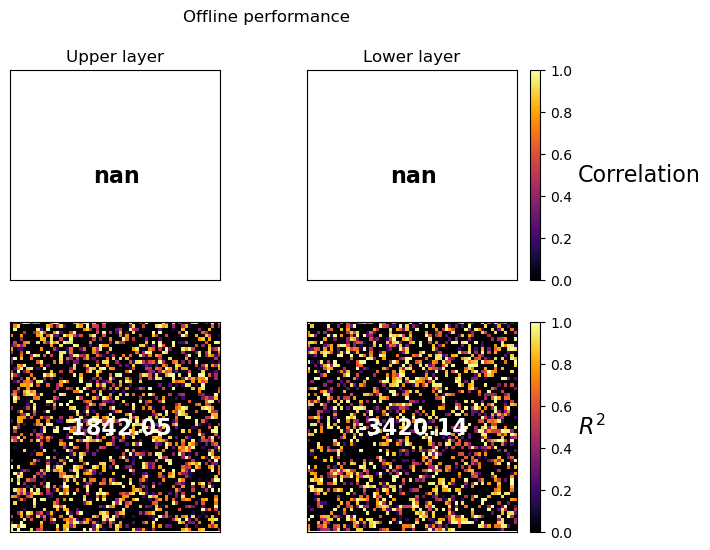

In [65]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds1.q_subgrid_forcing_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds1.q_subgrid_forcing_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

In [67]:
#save parametrizations
param.models[0].save('gs://leap-permanent/panalluri/models/fcnn_qu_to_Sq2_2/models/0')
param.models[1].save('gs://leap-permanent/panalluri/models/fcnn_qu_to_Sq2_2/models/1')

In [18]:
#to reload FCNN parametrization
#param = FCNNParameterization('gs://leap-permanent/panalluri/models/fcnn_qu_to_Sq2')

# Run online

In [104]:
# the below just takes the starting params from Patricia's eddy simulation w/ forcing1

In [71]:
import json
eddy_forcing1 = xr.open_zarr("gs://leap-persistent/pbluc/eddy/forcing1").isel(run=0).load()
param_run = param.run_online(**json.loads(eddy_forcing1.pyqg_params))

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 9.34e-04, CFL: 0.070
INFO: Step: 2000, Time: 7.20e+06, KE: 1.42e-03, CFL: 0.071
INFO: Step: 3000, Time: 1.08e+07, KE: 1.55e-03, CFL: 0.085
INFO: Step: 4000, Time: 1.44e+07, KE: 1.53e-03, CFL: 0.072
INFO: Step: 5000, Time: 1.80e+07, KE: 1.51e-03, CFL: 0.073
INFO: Step: 6000, Time: 2.16e+07, KE: 1.52e-03, CFL: 0.078
INFO: Step: 7000, Time: 2.52e+07, KE: 1.56e-03, CFL: 0.093
INFO: Step: 8000, Time: 2.88e+07, KE: 1.54e-03, CFL: 0.073
INFO: Step: 9000, Time: 3.24e+07, KE: 1.54e-03, CFL: 0.094
INFO: Step: 38000, Time: 1.37e+08, KE: 1.61e-03, CFL: 0.078
INFO: Step: 39000, Time: 1.40e+08, KE: 1.68e-03, CFL: 0.097
INFO:

In [30]:
param_run

<xarray.Dataset>
Dimensions:            (time: 87, lev: 2, y: 64, x: 64, lev_mid: 1, l: 64, k: 33)
Coordinates:
  * time               (time) float64 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/27)
    q                  (time, lev, y, x) float64 3.681e-07 ... 5.124e-07
    u                  (time, lev, y, x) float64 0.0 0.0 ... 0.002626 0.01031
    v                  (time, lev, y, x) float64 0.0 0.0 0.0 ... 0.01167 0.02134
    ufull              (time, lev, y, x) float64 0.025 0.025 ... 0.01031
    vfull              (time, lev, y, x) float64 0.0 0.0 0.0 ... 0.01167 0.02134
    Ubg                (time, lev) float64 0.025 0.0 0.025 0.0 ... 0.0 0.025 0.0
    ...                 ...
    ENSgenspec         (time, l, k) float64 nan nan nan ... -1.748e-50 -4.34e-59
    ENSfrictionspec    (time, l, k) float64 nan nan ... -3.833e-49 -1.951e-58
    APEgenspec         (time, l, k) float64 nan nan ... -3.933e-42 -9.765e-51
    APEflux            (time, l, k) float64 nan nan nan ... 5.984e-27 1.152e-31
    KEflux             (time, l, k) float64 nan nan nan ... 2.445e-25 4.29e-30
    APEgen             (time) float64 nan nan nan ... 6.627e-11 6.581e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [31]:
eddy_model_highRes = xr.open_zarr("gs://leap-scratch/panalluri/eddy_model_highRes.zarr") 
eddy_model_lowRes = xr.open_zarr("gs://leap-scratch/panalluri/eddy_model_lowRes.zarr") 
eddy_model_lowRes

<xarray.Dataset>
Dimensions:            (time: 1, l: 64, k: 33, lev: 2, y: 64, x: 64, lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 3.11e+08
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
Data variables: (12/32)
    APEflux            (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    APEgen             (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    APEgenspec         (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    Dissspec           (time, l, k) float64 dask.array<chunksize=(1, 64, 33), meta=np.ndarray>
    EKE                (time, lev) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    EKEdiss            (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    ...                 ...
    u                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    ufull              (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    uh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
    v                  (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 64, 64), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(1, 2, 64, 33), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          4096
    pyqg:W:          1000000.0
    pyqg:beta:       0
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  155520000.0
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

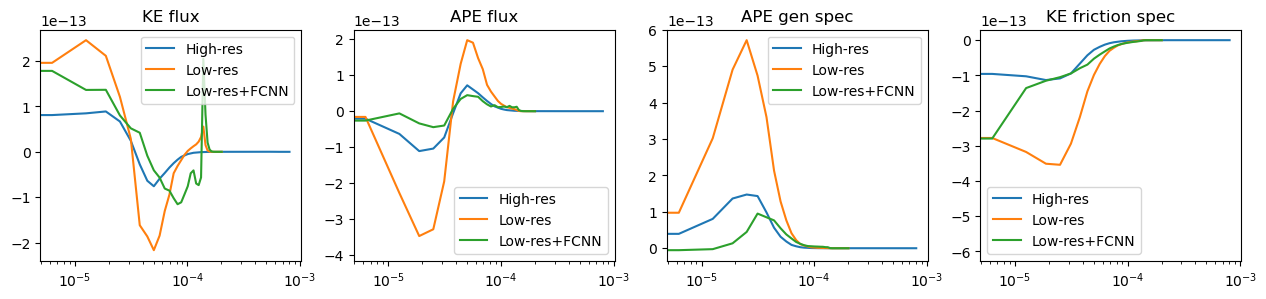

In [99]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(15.5,3))
plt.subplot(1,4,1, title='KE flux')
plt.semilogx(eddy_model_highRes.KEflux.k, eddy_model_highRes.KEflux.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.KEflux.k, eddy_model_lowRes.KEflux.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.KEflux.k, param_run.KEflux.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,2, title='APE flux')
plt.semilogx(eddy_model_highRes.APEflux.k, eddy_model_highRes.APEflux.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.APEflux.k, eddy_model_lowRes.APEflux.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.APEflux.k, param_run.APEflux.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,3, title='APE gen spec')
plt.semilogx(eddy_model_highRes.APEgenspec.k, eddy_model_highRes.APEgenspec.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.APEgenspec.k, eddy_model_lowRes.APEgenspec.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.APEgenspec.k, param_run.APEgenspec.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()
plt.subplot(1,4,4, title='KE friction spec')
plt.semilogx(eddy_model_highRes.KEfrictionspec.k, eddy_model_highRes.KEfrictionspec.mean(dim='l').transpose(), label="High-res")
plt.semilogx(eddy_model_lowRes.KEfrictionspec.k, eddy_model_lowRes.KEfrictionspec.mean(dim='l').transpose(), label="Low-res")
plt.semilogx(param_run.KEfrictionspec.k, param_run.KEfrictionspec.mean(dim='time').mean(dim='l').transpose(), label="Low-res+FCNN")
plt.legend()